## Restaurant Rating Prediction

Problem Statement : Given is a dataset containing the data about orders placed on zomato for the restaurants in Banglore. We have to predict the overall rating of the restaurant based on various factors.

## column Description

- url: contains the url of the restaurant in the zomato website
- address: contains the address of the restaurant in Bengaluru
- name: contains the name of the restaurant
- online_order: whether online ordering is available in the restaurant or not
- book_table: table book option available or not
- rate: contains the overall rating of the restaurant out of 5
- votes: contains total number of rating for the restaurant as of the above mentioned date
- phone: contains the phone number of the restaurant
- location: contains the neighborhood in which the restaurant is located
- rest_type: restaurant type
- dish_liked: dishes people liked in the restaurant
- cuisines: food styles, separated by comma
- approx_cost(for two people): contains the approximate cost for meal for two people
- reviews_list: list of tuples containing reviews for the restaurant, each tuple
- menu_item: contains list of menus available in the restaurant
- listed_in(type): type of meal
- listed_in(city): contains the neighborhood in which the restaurant is listed

## Importing Required Libraries

In [1]:
import numpy as np                     
import pandas as pd                
import matplotlib.pyplot as plt    
import seaborn as sns              
%matplotlib inline
sns.set()                    

import warnings
warnings.filterwarnings('ignore')

## Load and analyze the Dataset

In [2]:
# Importing the Dataset
df = pd.read_csv("zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Size of the Dataset

In [3]:
df.shape

(51717, 17)

Outcome : There are 51717 rows and 17 columns in our Dataset.

## Columns in the Dataset

In [4]:
df.columns.to_list()

['url',
 'address',
 'name',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)',
 'reviews_list',
 'menu_item',
 'listed_in(type)',
 'listed_in(city)']

Here, we can see the list of columns in which some of the columns are important and some are not to much important in the context of the problem. So, further we drop and process the data.

## Renaming Column

In [5]:
# Renaming the column approx_cost(for two people) with approx_cost.

df.rename(columns = {'approx_cost(for two people)' : 'approx_cost'}, inplace = True)

## Data Cleaning

-Now, we clean our data by dropping the irrelevant columns, handling the wrong datatypes, handling the null values and the outliers.

## Dropping Irrelevant Columns

In [6]:
# Here, url, address, menu_item, reviews_list, dish_liked, phone, listed_in(type) are irrelevant for 
# the problem's solution

df.drop(['url','address','menu_item','reviews_list','dish_liked','phone','listed_in(type)','listed_in(city)'],axis=1,inplace=True)

In [7]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600


## Checking and Handling the Datatypes

In [8]:
# Checking the types of data present in the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          51717 non-null  object
 1   online_order  51717 non-null  object
 2   book_table    51717 non-null  object
 3   rate          43942 non-null  object
 4   votes         51717 non-null  int64 
 5   location      51696 non-null  object
 6   rest_type     51490 non-null  object
 7   cuisines      51672 non-null  object
 8   approx_cost   51371 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.6+ MB


From above result, we can see that the columns { rate, location, rest_type, approx_cost, cuisines } either have null values, wrong datatypes or both.

## Rate Column

In [9]:
# Checking the unique values in the Rate column
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

Observation: There are many null values and garbage values in rate columns.

In [10]:
# Replacing all the null values and garbage values with numbers.
df['rate'] =  df['rate'].str.replace("/5", "")
df['rate'] =  df['rate'].str.replace("NEW", "NaN")
df['rate'] =  df['rate'].str.replace("nan", "NaN")
df['rate'] =  df['rate'].str.replace("-", "NaN")
df['rate'] =  df['rate'].str.replace(" ", "")
df['rate'] =  df['rate'].fillna(np.nan)

In [11]:
# Verifying the results
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NaN', '2.9', '3.5', nan,
       '2.6', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [12]:
# Changing the Datatype of Rate column from object to float
df['rate'] = df['rate'].astype(float)

## Approx Cost Column

In [13]:
# Checking the unique values in the Approx Cost column of the Dataset
df['approx_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [14]:
df['approx_cost'].isnull().sum()

346

In [15]:
# Replacing the null values and make it able to convert 
df['approx_cost'] =  df['approx_cost'].str.replace("nan", "NaN")
df['approx_cost'] =  df['approx_cost'].fillna('NaN')
df['approx_cost'] =  df['approx_cost'].str.replace(",", "")

In [16]:
# Verifying the Results
df['approx_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', 'NaN', '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [17]:
df['approx_cost'].isnull().sum()

0

In [18]:
# Changing the Datatype of the column from Object to Float
df['approx_cost'] = df['approx_cost'].astype(float)

In [19]:
# Again, checking the datatypes of columns to verify
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51717 non-null  object 
 1   online_order  51717 non-null  object 
 2   book_table    51717 non-null  object 
 3   rate          41665 non-null  float64
 4   votes         51717 non-null  int64  
 5   location      51696 non-null  object 
 6   rest_type     51490 non-null  object 
 7   cuisines      51672 non-null  object 
 8   approx_cost   51371 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 3.6+ MB


## Checking for Null Values

In [20]:
df.isna().sum()

name                0
online_order        0
book_table          0
rate            10052
votes               0
location           21
rest_type         227
cuisines           45
approx_cost       346
dtype: int64

In [21]:
# Here, we dropping the null values from the columns having lesser number of null values

df = df[df['location'].notna()]
df = df[df['rest_type'].notna()]
df = df[df['cuisines'].notna()]
df = df[df['approx_cost'].notna()]

In [22]:
# Verifying the results
df.isna().sum()

name               0
online_order       0
book_table         0
rate            9885
votes              0
location           0
rest_type          0
cuisines           0
approx_cost        0
dtype: int64

In [23]:
# Imputing the null values with median of rate column
df['rate'] = df['rate'].fillna(df['rate'].median())

# Verifying the Results
df.isna().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
approx_cost     0
dtype: int64

In [24]:
# After dropping the values, we will reset the index
df.reset_index(inplace=True)
df.drop(['index'], axis=1, inplace=True)

In [25]:

df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0


## Data Visualization

- Now, we visualize our data based on different parameters to understand the relations and some insights from out dataset.

## No. of orders vs Restaurants

In [26]:
len(df['name'].unique())

8723

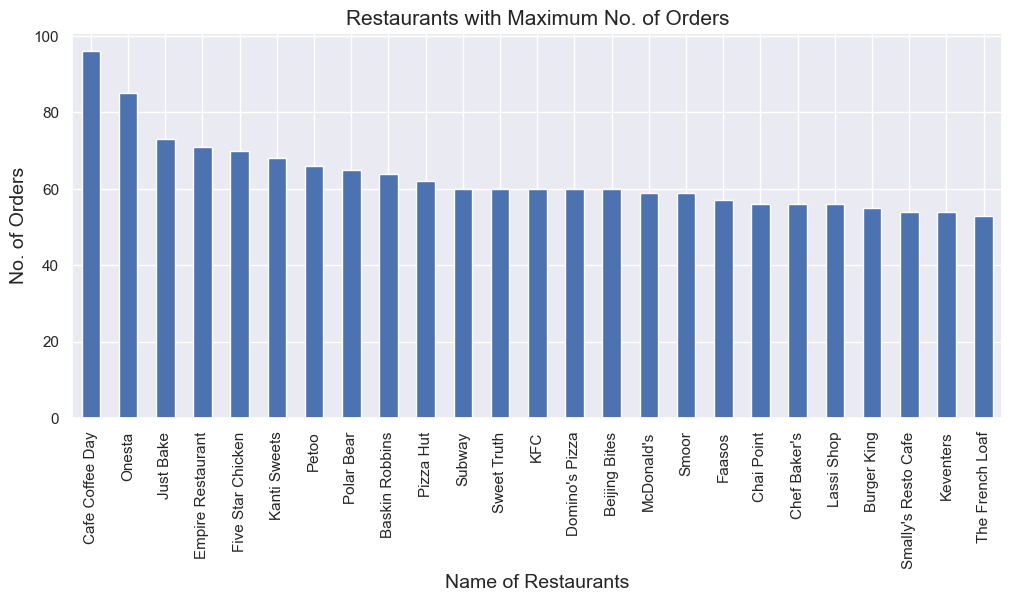

In [27]:
plt.figure(figsize = (12,5))
data = df['name'].value_counts()[:25]
data.plot(kind = 'bar')
plt.xlabel('Name of Restaurants', size = 14)
plt.ylabel('No. of Orders', size = 14)
plt.title("Restaurants with Maximum No. of Orders", fontsize=15)
plt.show()

Above Bar chart shows that the Cafe Coffee Day and Onesta got higher number of orders as compared to others.

## Number of Restaurants having Online Order Facility

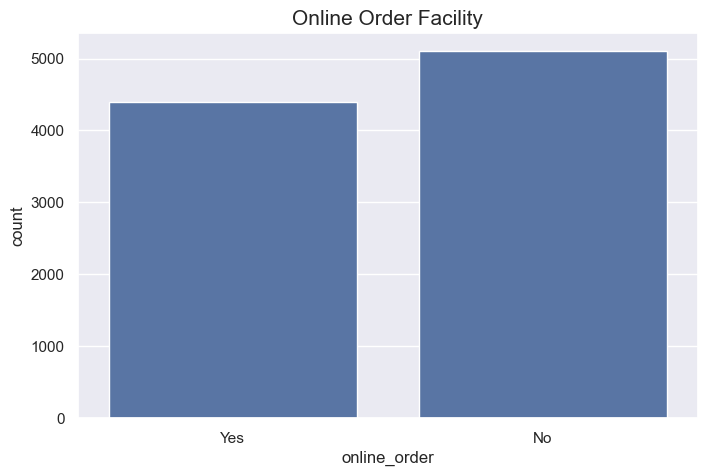

In [28]:
data = df[['name', 'online_order']].drop_duplicates()

plt.figure(figsize = (8,5))
ax = sns.countplot(x="online_order", data=data).set_title('Online Order Facility',fontsize = 15)
plt.show()

## Number of restaurants having Prebooking Table Facility

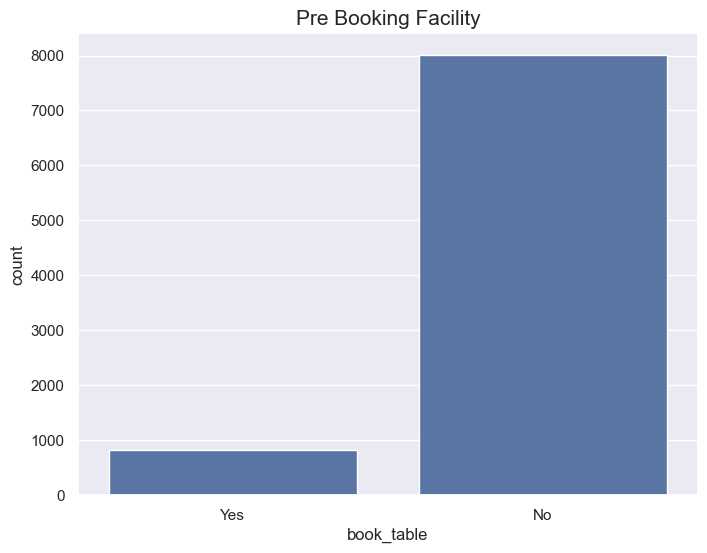

In [29]:
data = df[['name', 'book_table']].drop_duplicates()

plt.figure(figsize = (8,6))
ax = sns.countplot(x="book_table", data=data).set_title('Pre Booking Facility', fontsize = 15)
plt.show()

## Top Locations got Higher Number of Orders

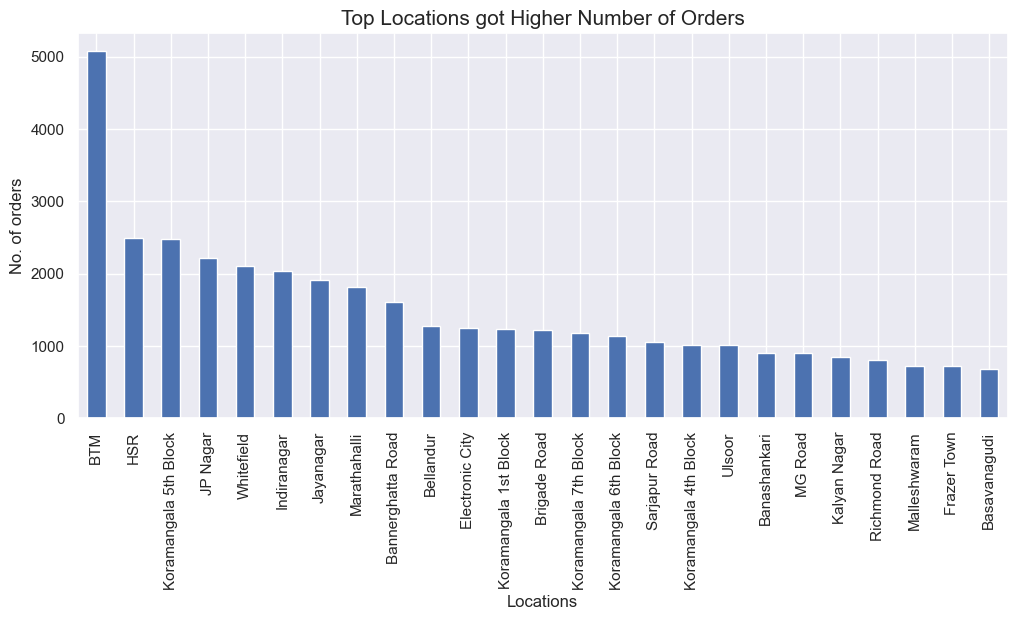

In [30]:
plt.figure(figsize = (12,5))
data = df.location.value_counts()[0:25]
data.plot(kind='bar')
plt.xlabel('Locations')
plt.ylabel('No. of orders')
plt.title ('Top Locations got Higher Number of Orders', size = 15)
plt.show()

Above visualization shows that Location BTM got higher number of orders among all others locations.

## Most Common Ratings for orders

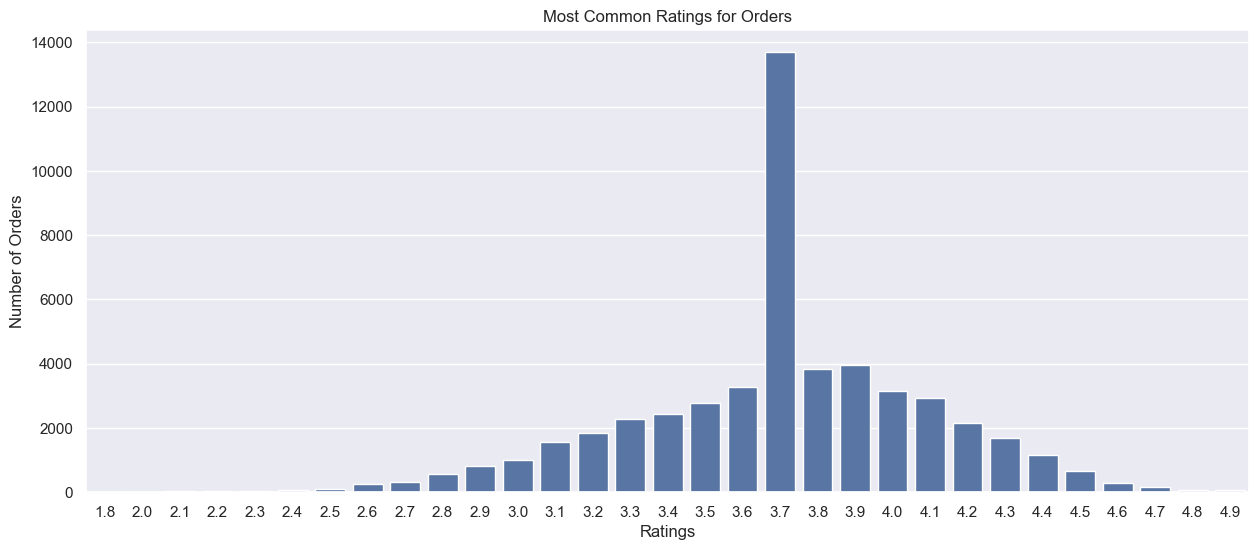

In [31]:
data = df['rate'].value_counts().sort_index()
plt.figure(figsize = (15,6))
sns.barplot(x=data.index, y=data.values)
plt.xlabel('Ratings')
plt.ylabel('Number of Orders')
plt.title('Most Common Ratings for Orders')
plt.show()

## Approximate Costs for meal of two people

In [32]:
data = pd.DataFrame(df["approx_cost"].value_counts().reset_index()[:25])
data.columns = ['approx_cost', 'count']
data = data.set_index('approx_cost')

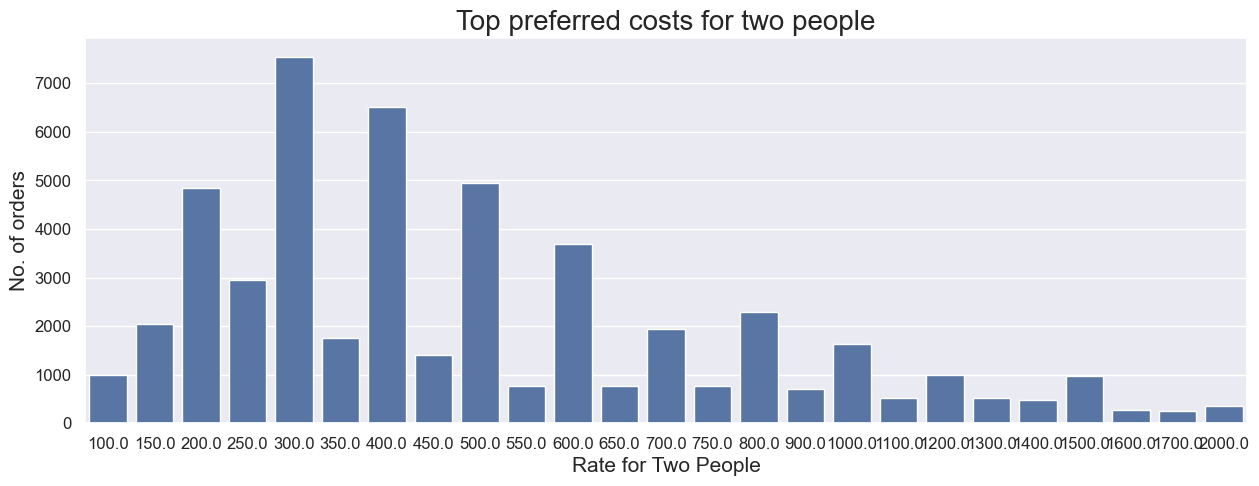

In [33]:
plt.figure(figsize = (15, 5))
sns.barplot(x = data.index, y = data['count'])
plt.xlabel('Rate for Two People', size=15)
plt.ylabel('No. of orders', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title('Top preferred costs for two people', size = 20)
plt.show()

## Restaurant Type vs No. of orders

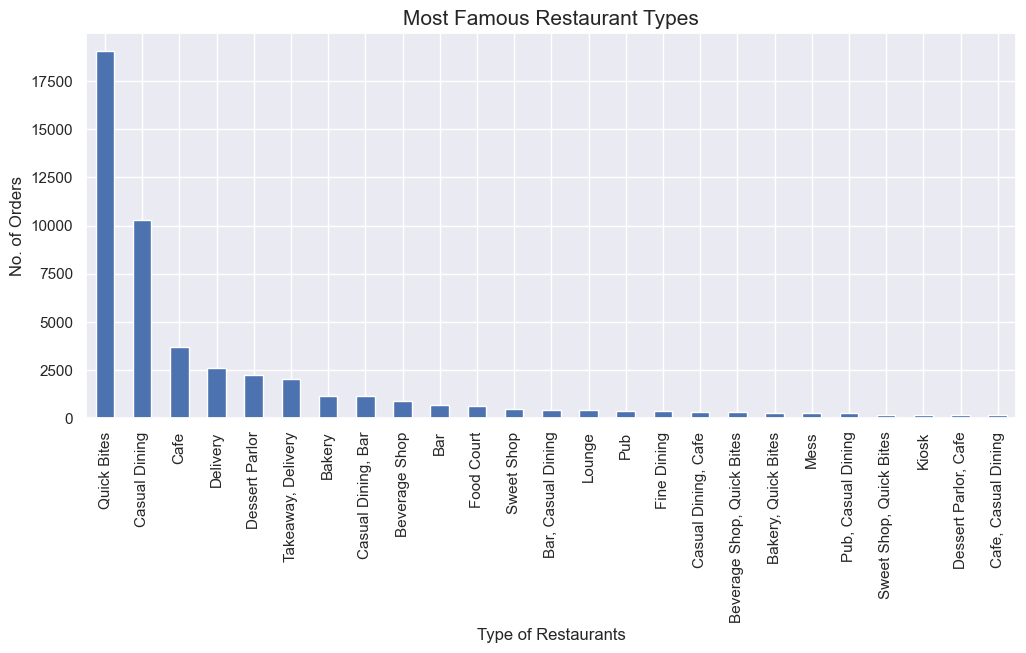

In [34]:
plt.figure(figsize=(12,5))
ax = df.rest_type.value_counts()[:25]
ax.plot(kind='bar')
plt.title("Most Famous Restaurant Types",fontsize=15)
plt.xlabel("Type of Restaurants")
plt.ylabel("No. of Orders")
plt.show()

## Most famous Cusines among People

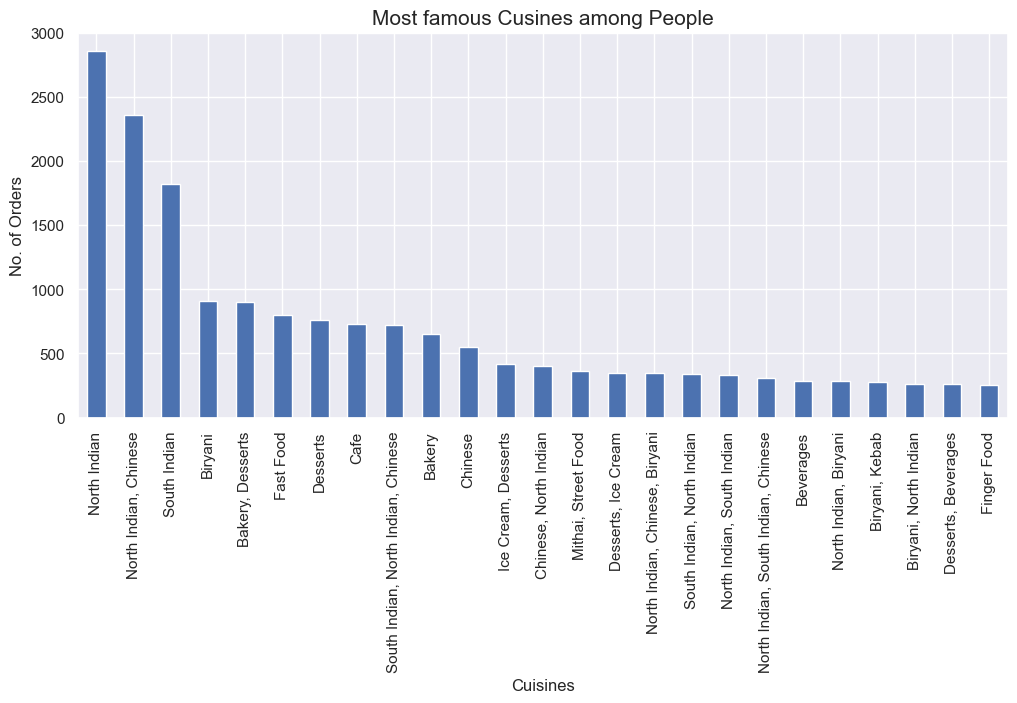

In [35]:
plt.figure(figsize=(12,5))
ax = df.cuisines.value_counts()[:25].plot(kind='bar')
plt.title("Most famous Cusines among People",fontsize=15)
plt.xlabel("Cuisines")
plt.ylabel ("No. of Orders")
plt.show()

## Top Locations with Most Number of Restaurants

In [36]:
top_areas = pd.DataFrame(df.groupby(by='location')['name'].nunique())
top_areas.columns = ['count']
top_areas.sort_values(by='count', ascending= False, inplace=True)

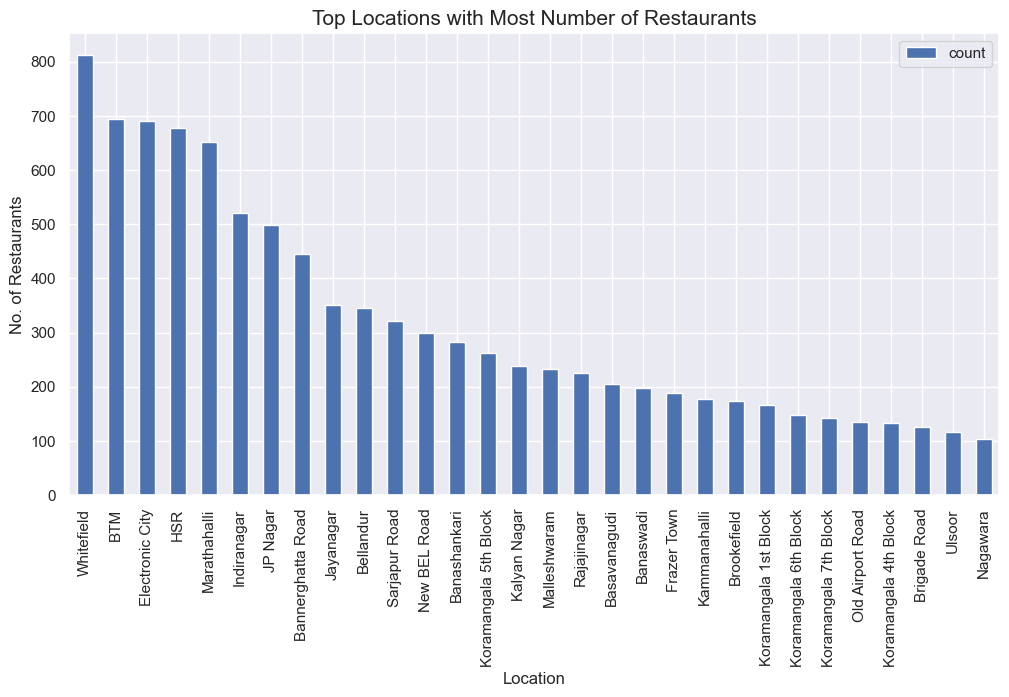

In [37]:
plt.rcParams['figure.figsize'] = (12,6)
ax = top_areas[0:30].plot(kind='bar')
plt.xlabel('Location', size = 12)
plt.ylabel('No. of Restaurants', size = 12)
plt.title('Top Locations with Most Number of Restaurants', size = 15)
plt.show()

In [38]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0


## Model Training

In [39]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

In [40]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51148 entries, 0 to 51147
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51148 non-null  object 
 1   online_order  51148 non-null  object 
 2   book_table    51148 non-null  object 
 3   rate          51148 non-null  float64
 4   votes         51148 non-null  int64  
 5   location      51148 non-null  object 
 6   rest_type     51148 non-null  object 
 7   cuisines      51148 non-null  object 
 8   approx_cost   51148 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 3.5+ MB


In [42]:
print("Categories in 'name' variable:     ",end=" " )
print(df['name'].unique())

print("Categories in 'online_order' variable:  ",end=" ")
print(df['online_order'].unique())

print("Categories in'book_table' variable:",end=" " )
print(df['book_table'].unique())

print("Categories in 'location' variable:     ",end=" " )
print(df['location'].unique())

print("Categories in 'rest_type' variable:     ",end=" " )
print(df['rest_type'].unique())

print("Categories in 'cuisines' variable:     ",end=" " )
print(df['cuisines'].unique())

Categories in 'name' variable:      ['Jalsa' 'Spice Elephant' 'San Churro Cafe' ... 'Nawabs Empire'
 'SeeYa Restaurant'
 'Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...']
Categories in 'online_order' variable:   ['Yes' 'No']
Categories in'book_table' variable: ['Yes' 'No']
Categories in 'location' variable:      ['Banashankari' 'Basavanagudi' 'Mysore Road' 'Jayanagar'
 'Kumaraswamy Layout' 'Rajarajeshwari Nagar' 'Vijay Nagar' 'Uttarahalli'
 'JP Nagar' 'South Bangalore' 'City Market' 'Nagarbhavi'
 'Bannerghatta Road' 'BTM' 'Kanakapura Road' 'Bommanahalli'
 'CV Raman Nagar' 'Electronic City' 'HSR' 'Marathahalli' 'Wilson Garden'
 'Shanti Nagar' 'Koramangala 5th Block' 'Koramangala 8th Block'
 'Richmond Road' 'Koramangala 7th Block' 'Jalahalli'
 'Koramangala 4th Block' 'Bellandur' 'Sarjapur Road' 'Whitefield'
 'East Bangalore' 'Old Airport Road' 'Indiranagar' 'Koramangala 1st Block'
 'Frazer Town' 'RT Nagar' 'MG Road' 'Brigade Road' 'Lavelle Road'
 'Church Street' 'Ulsoor' 'Reside

In [43]:
# Create Column Transformer with 3 types of transformers
num_features = df.select_dtypes(exclude="object").columns

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    [
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.name = le.fit_transform(df.name)
df.online_order = le.fit_transform(df.online_order)
df.book_table = le.fit_transform(df.book_table)
df.location = le.fit_transform(df.location)
df.rest_type = le.fit_transform(df.rest_type)
df.cuisines = le.fit_transform(df.cuisines)

In [45]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost
0,3664,1,1,4.1,775,1,27,2145,800.0
1,6968,1,0,4.1,787,1,27,947,800.0
2,6449,1,0,3.8,918,1,22,761,800.0
3,198,0,0,3.7,88,1,78,2539,300.0
4,2919,0,0,3.8,166,4,27,2174,600.0


In [46]:
X = df.drop(columns=['rate'],axis=1)

In [47]:
X.head()

,name,online_order,book_table,votes,location,rest_type,cuisines,approx_cost
0,3664,1,1,775,1,27,2145,800.0
1,6968,1,0,787,1,27,947,800.0
2,6449,1,0,918,1,22,761,800.0
3,198,0,0,88,1,78,2539,300.0
4,2919,0,0,166,4,27,2174,600.0


In [50]:
y = df['rate']

In [51]:
y

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51143    3.6
51144    3.7
51145    3.7
51146    4.3
51147    3.4
Name: rate, Length: 51148, dtype: float64

In [52]:
X.shape

(51148, 8)

In [53]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((40918, 8), (10230, 8))

In [54]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [58]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "XGBRegressor": XGBRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.3373
- Mean Absolute Error: 0.2517
- R2 Score: 0.2698
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3378
- Mean Absolute Error: 0.2513
- R2 Score: 0.2765


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.3454
- Mean Absolute Error: 0.2550
- R2 Score: 0.2343
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3474
- Mean Absolute Error: 0.2557
- R2 Score: 0.2345


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.3373
- Mean Absolute Error: 0.2517
- R2 Score: 0.2698
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3378
- Mean Absolute Error: 0.2513
- R2 Score: 0.2765


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1372
- Mean Absolute Error: 0.0671
- R2 Score: 0.8791
-----------------------

In [59]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,Random Forest Regressor,0.944231
4,Decision Tree,0.919509
5,XGBRegressor,0.790202
3,K-Neighbors Regressor,0.770542
0,Linear Regression,0.276481
2,Ridge,0.276479
1,Lasso,0.234484
6,AdaBoost Regressor,0.143531


## Random Forest Regressor	

In [60]:
RFR_model = RandomForestRegressor()
RFR_model = RFR_model.fit(X_train, y_train)
y_pred = RFR_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 94.39


Text(0, 0.5, 'Predicted')

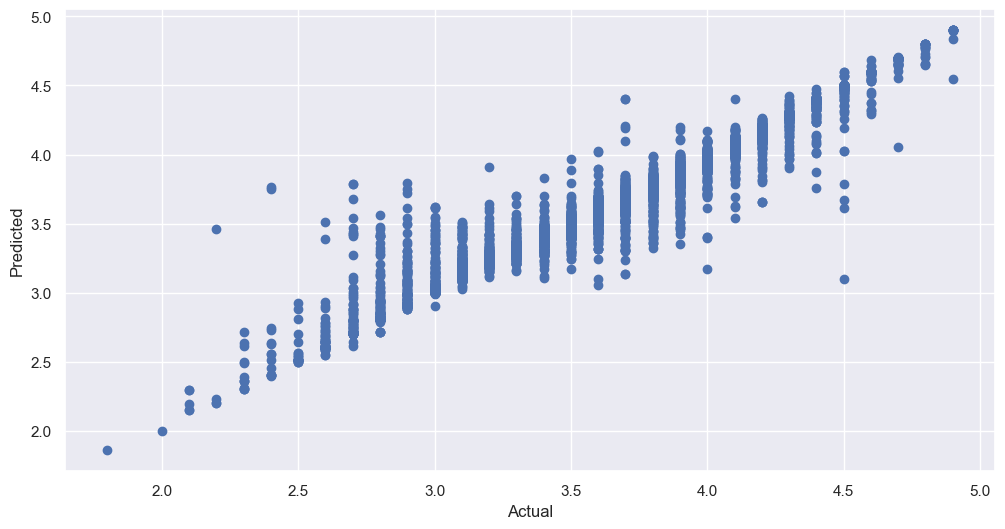

In [61]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='rate'>

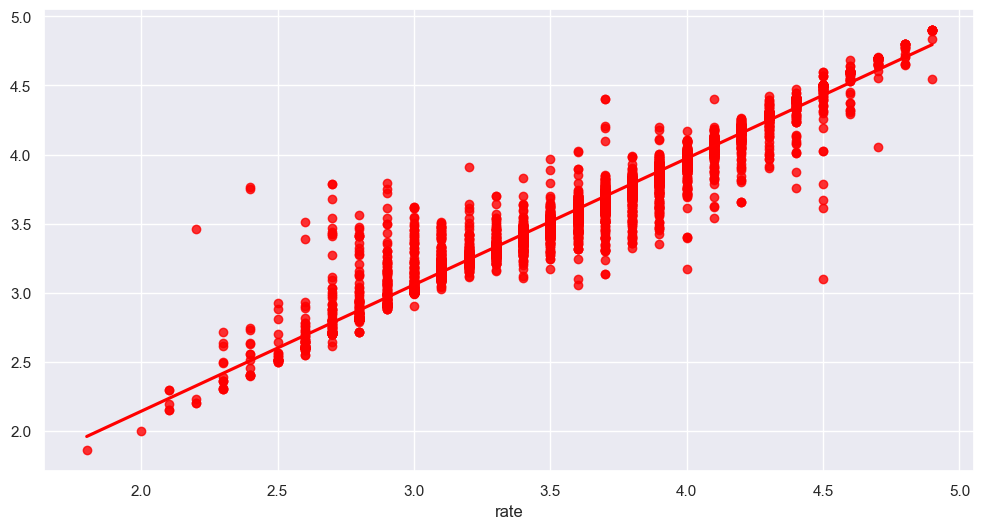

In [62]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [63]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
28041,3.2,3.209000,-9.000000e-03
30893,3.7,3.589678,1.103222e-01
11917,3.7,3.700000,-2.073897e-13
47794,3.1,3.244500,-1.445000e-01
12400,3.3,3.351000,-5.100000e-02
...,...,...,...
26735,3.6,3.548000,5.200000e-02
31993,3.9,3.900000,4.884981e-15
31350,3.0,3.000000,0.000000e+00
2301,3.4,3.336222,6.377778e-02


## Decision Tree

In [64]:
DT_model = RandomForestRegressor()
DT_model = DT_model.fit(X_train, y_train)
y_pred = DT_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 94.31


Text(0, 0.5, 'Predicted')

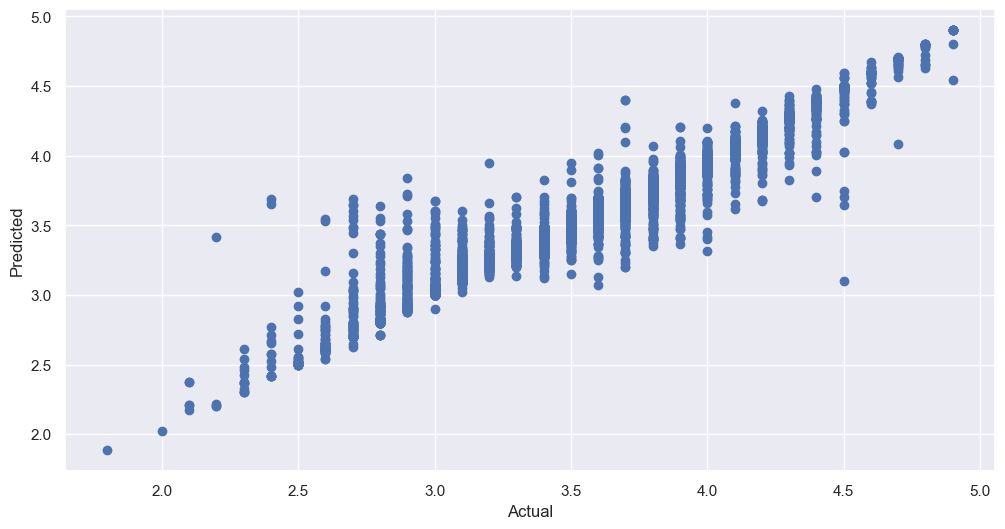

In [65]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='rate'>

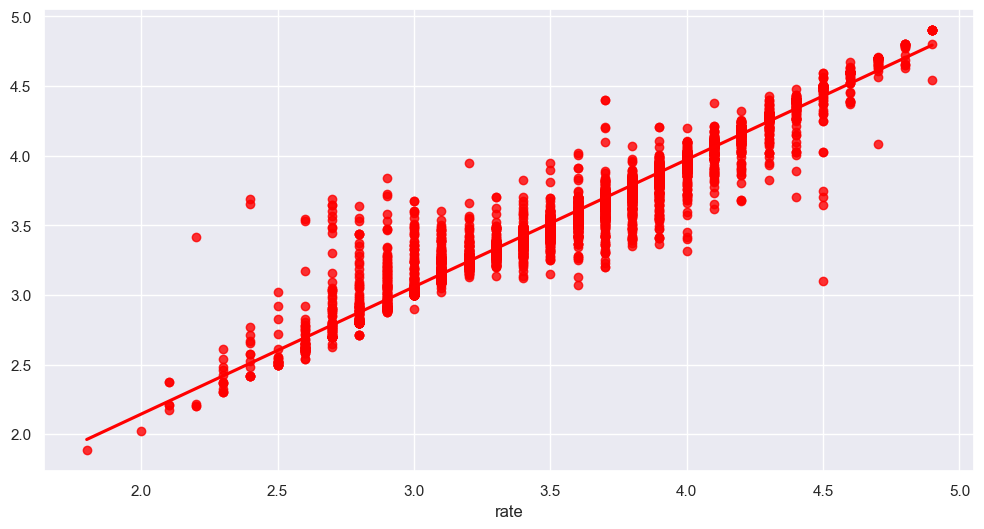

In [66]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [67]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
28041,3.2,3.217000,-1.700000e-02
30893,3.7,3.631538,6.846154e-02
11917,3.7,3.700000,-2.051692e-13
47794,3.1,3.237000,-1.370000e-01
12400,3.3,3.337667,-3.766667e-02
...,...,...,...
26735,3.6,3.521333,7.866667e-02
31993,3.9,3.898000,2.000000e-03
31350,3.0,3.000000,0.000000e+00
2301,3.4,3.396000,4.000000e-03


## Linear Regression

In [68]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 27.65


Text(0, 0.5, 'Predicted')

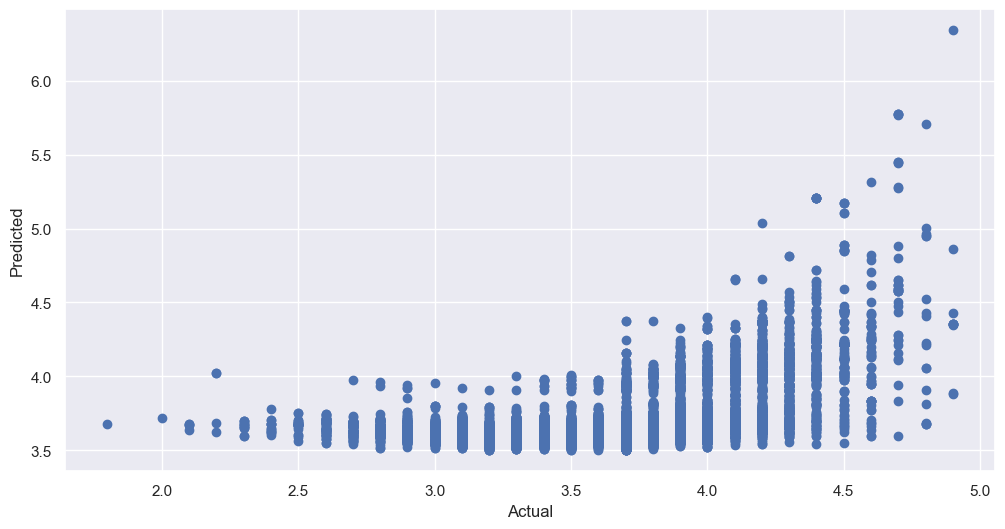

In [69]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='rate'>

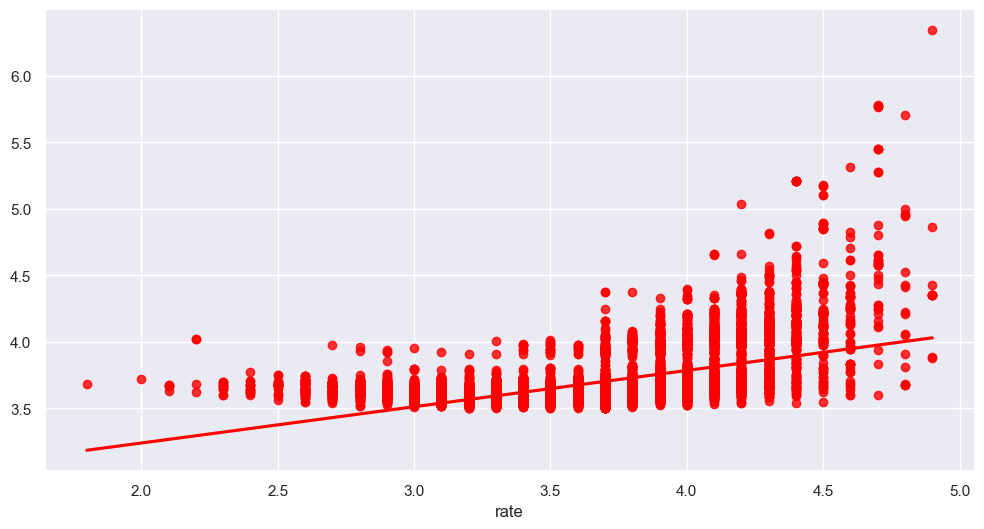

In [70]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [71]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
28041,3.2,3.532846,-0.332846
30893,3.7,3.652626,0.047374
11917,3.7,3.532856,0.167144
47794,3.1,3.618597,-0.518597
12400,3.3,3.656308,-0.356308
...,...,...,...
26735,3.6,3.638548,-0.038548
31993,3.9,3.644945,0.255055
31350,3.0,3.646350,-0.646350
2301,3.4,3.639490,-0.239490


In [75]:

import pickle 
# Saving model to disk
pickle.dump(RFR_model, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))